<a target="_blank" href="https://colab.research.google.com/github/RanjeetKumbhar01/TE_IT_DSBDA_ASSIGNMENTS_SPPU/blob/main/Group_B/B_4/b_4_air.ipynb">
  <img align="left" alt="Goolge Colab"  src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
<br>

### Operations:
a. Data cleaning<br>
b. Data integration<br>
c. Data transformation<br>
d. Error correcting<br>

In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('airquality_data.csv')

In [6]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72736 entries, 0 to 72735
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stn_code                     45921 non-null  float64
 1   sampling_date                72736 non-null  object 
 2   state                        72735 non-null  object 
 3   location                     72735 non-null  object 
 4   agency                       44678 non-null  object 
 5   type                         71710 non-null  object 
 6   so2                          66407 non-null  float64
 7   no2                          70189 non-null  float64
 8   rspm                         66530 non-null  float64
 9   spm                          34803 non-null  float64
 10  location_monitoring_station  67915 non-null  object 
 11  pm2_5                        87 non-null     float64
 12  date                         72735 non-null  object 
dtypes: float64(6), o

In [8]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

### Data Cleaning

In [9]:
# Change data type from float64 to float32 for Space Complexity
df['so2'] = df['so2'].astype('float32')
df['no2'] = df['no2'].astype('float32')
df['rspm'] = df['rspm'].astype('float32')
df['spm'] = df['spm'].astype('float32')
df['date'] = df['date'].astype('string')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72736 entries, 0 to 72735
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stn_code                     45921 non-null  float64
 1   sampling_date                72736 non-null  object 
 2   state                        72735 non-null  object 
 3   location                     72735 non-null  object 
 4   agency                       44678 non-null  object 
 5   type                         71710 non-null  object 
 6   so2                          66407 non-null  float32
 7   no2                          70189 non-null  float32
 8   rspm                         66530 non-null  float32
 9   spm                          34803 non-null  float32
 10  location_monitoring_station  67915 non-null  object 
 11  pm2_5                        87 non-null     float64
 12  date                         72735 non-null  string 
dtypes: float32(4), f

In [10]:
df=df.drop_duplicates()

In [11]:
df.isna().sum()

stn_code                       26815
sampling_date                      0
state                              1
location                           1
agency                         28056
type                            1018
so2                             6328
no2                             2547
rspm                            6179
spm                            37732
location_monitoring_station     4794
pm2_5                          72413
date                               1
dtype: int64

In [12]:
percent_missing = df.isnull().sum() * 100 / len(df)

In [13]:
percent_missing.sort_values(ascending=False)

pm2_5                          99.880000
spm                            52.044138
agency                         38.697931
stn_code                       36.986207
so2                             8.728276
rspm                            8.522759
location_monitoring_station     6.612414
no2                             3.513103
type                            1.404138
state                           0.001379
location                        0.001379
date                            0.001379
sampling_date                   0.000000
dtype: float64

In [14]:
df=df.drop(['stn_code', 'agency','sampling_date','location_monitoring_station','pm2_5'], axis = 1)

In [15]:
df.head()

,state,location,type,so2,no2,rspm,spm,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,1990-03-01


In [16]:
df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'date'], dtype='object')

In [17]:
col_var = ['state', 'location', 'type','date']
col_num = ['so2','no2','rspm','spm']

In [18]:
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'string':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

In [19]:
df.isna().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
date        0
dtype: int64

In [20]:
df

,state,location,type,so2,no2,rspm,spm,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.800000,17.400000,99.066422,230.639023,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.100000,7.000000,99.066422,230.639023,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.200000,28.500000,99.066422,230.639023,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.300000,14.700000,99.066422,230.639023,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.700000,7.500000,99.066422,230.639023,1990-03-01
...,...,...,...,...,...,...,...,...
72731,Delhi,Delhi,"Residential, Rural and other Areas",5.000000,57.000000,119.000000,230.639023,2013-08-29
72732,Delhi,Delhi,"Residential, Rural and other Areas",2.000000,72.000000,117.000000,230.639023,2013-10-09
72733,Delhi,Delhi,"Residential, Rural and other Areas",2.000000,93.000000,97.000000,230.639023,2013-11-09
72734,Delhi,Delhi,"Residential, Rural and other Areas",4.000000,69.000000,125.000000,230.639023,2013-12-09


In [21]:
df.isna().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
date        0
dtype: int64


# Data integration

In [22]:
subSet1 = df[['state', 'type']]
subSet2 = df[['state','location']]

In [23]:
subSet1.head()

,state,type
0,Andhra Pradesh,"Residential, Rural and other Areas"
1,Andhra Pradesh,Industrial Area
2,Andhra Pradesh,"Residential, Rural and other Areas"
3,Andhra Pradesh,"Residential, Rural and other Areas"
4,Andhra Pradesh,Industrial Area


In [24]:
subSet2.head()

,state,location
0,Andhra Pradesh,Hyderabad
1,Andhra Pradesh,Hyderabad
2,Andhra Pradesh,Hyderabad
3,Andhra Pradesh,Hyderabad
4,Andhra Pradesh,Hyderabad


In [25]:
concatenated_df = pd.concat([subSet1, subSet2], axis=1)

In [26]:
concatenated_df

,state,type,state,location
0,Andhra Pradesh,"Residential, Rural and other Areas",Andhra Pradesh,Hyderabad
1,Andhra Pradesh,Industrial Area,Andhra Pradesh,Hyderabad
2,Andhra Pradesh,"Residential, Rural and other Areas",Andhra Pradesh,Hyderabad
3,Andhra Pradesh,"Residential, Rural and other Areas",Andhra Pradesh,Hyderabad
4,Andhra Pradesh,Industrial Area,Andhra Pradesh,Hyderabad
...,...,...,...,...
72731,Delhi,"Residential, Rural and other Areas",Delhi,Delhi
72732,Delhi,"Residential, Rural and other Areas",Delhi,Delhi
72733,Delhi,"Residential, Rural and other Areas",Delhi,Delhi
72734,Delhi,"Residential, Rural and other Areas",Delhi,Delhi


### Error Correcting

In [27]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5 * IQR
    outlier_mask = (column < Q1 - threshold) | (column > Q3 + threshold)
    return column[~outlier_mask]

In [28]:
df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'date'], dtype='object')

In [29]:
# Remove outliers for each column using a loop
col_name = ['so2', 'no2', 'rspm', 'spm']
for col in col_name:
    df[col] = remove_outliers(df[col])

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

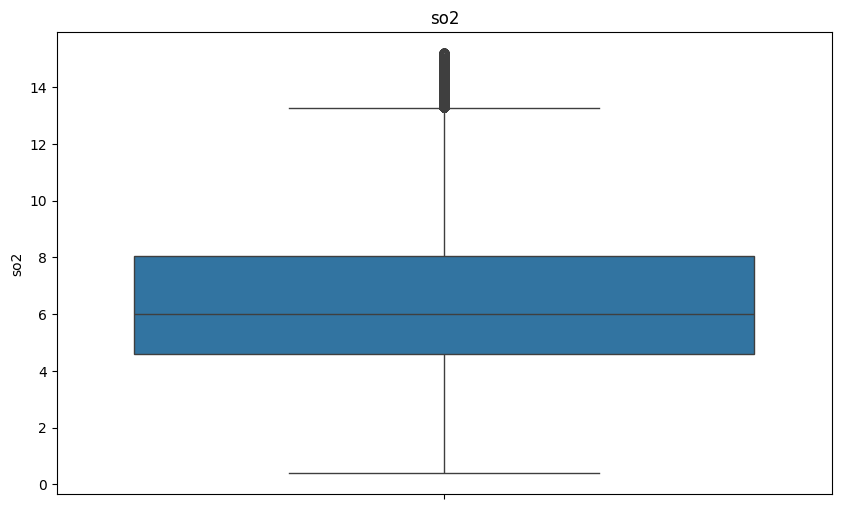

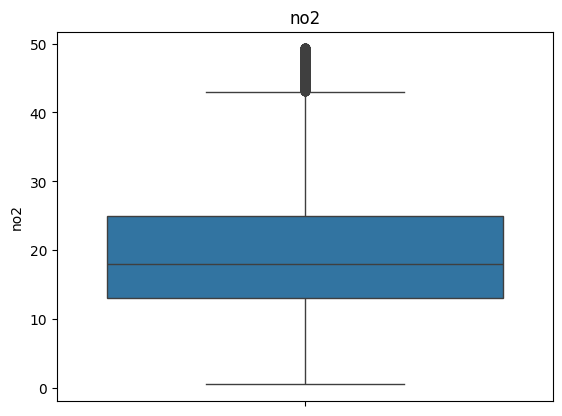

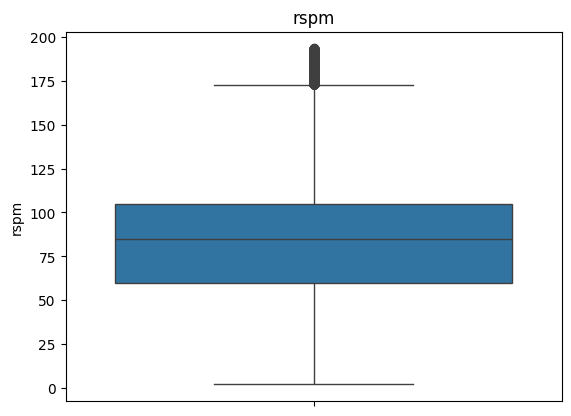

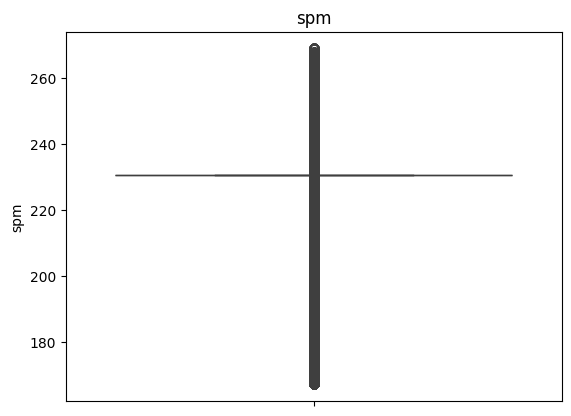

In [31]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

for col in col_name:
    sns.boxplot(data=df[col])
    plt.title(col)
    plt.show()

## Data Transform

In [32]:
from sklearn.preprocessing import LabelEncoder

col_label= ['state','location','type']
# Initialize LabelEncoder

encoder = LabelEncoder()
# Iterate over columns
for col in df.columns:
        # Fit and transform the column
        df[col] = encoder.fit_transform(df[col])

In [33]:
df

,state,location,type,so2,no2,rspm,spm,date
0,0,18,5,42,171,406,129,68
1,0,18,1,25,53,406,129,68
2,0,18,5,56,312,406,129,68
3,0,18,5,57,138,406,129,69
4,0,18,1,41,58,406,129,69
...,...,...,...,...,...,...,...,...
72731,8,10,5,44,521,497,129,3930
72732,8,10,5,14,521,488,129,3970
72733,8,10,5,14,521,392,129,4001
72734,8,10,5,34,521,519,129,4030
